In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import os
import torch
import torchvision
from PIL.ImageOps import mirror
import shutil
from torchvision import datasets, models, transforms
import torch.nn as nn
import torchvision.transforms.functional as F
from torch.nn import functional as F
import torch.optim as optim

from tqdm import tqdm

In [2]:
device = torch.device("cpu")  # torch.device("cuda:0")
model = models.resnet18(pretrained=False).to(device)
model.fc = nn.Linear(512, 2).to(device)
model.load_state_dict(torch.load('weights200219.h5'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3]:
img_orig=Image.open('Przechwytywanie.PNG').convert("RGB")

In [4]:
img = torchvision.transforms.Pad(50)(img_orig)

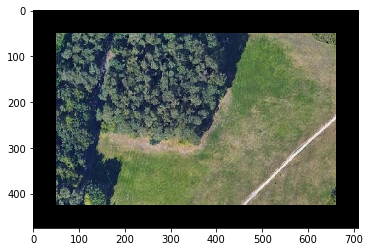

In [5]:
plt.imshow(img)

In [6]:
W, H=img.size
print(H, W)
M=np.zeros((H, W, 2),dtype=float)
C=np.zeros((H, W),dtype=float)

475 710


In [7]:
step_size = 10
for vertical_shift in tqdm(range(0, W, step_size)):
    for horizontal_shift in range(0, H, step_size):
        top=horizontal_shift
        bottom=224+horizontal_shift
        left=vertical_shift
        right=224+vertical_shift
        current_crop = img.crop((left, top, right, bottom))
        current_tensor = torchvision.transforms.ToTensor()(current_crop).unsqueeze(0).to(device)
        output = model(current_tensor)
        P = F.softmax(output, dim=1).detach().cpu().numpy()
#         print(P)
        y = horizontal_shift
        x = vertical_shift
        M[y:y+224, x:x+224] = (M[y:y+224, x:x+224] * C[y:y+224, x:x+224, None] + P) / (C[y:y+224, x:x+224, None] + 1)
        C[y:y+224, x:x+224, None] += 1

100%|██████████| 71/71 [02:55<00:00,  2.36s/it]


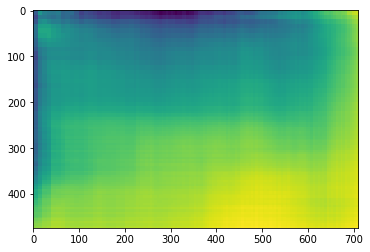

In [8]:
plt.imshow(M[:, :, 0])

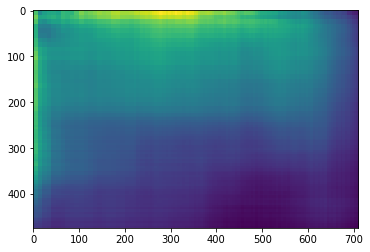

In [9]:
plt.imshow(M[:, :, 1])

In [10]:
matrix = np.zeros((H, W ,3), dtype=np.uint8) 

In [11]:
M_result = np.argmax(M, axis=2)

In [12]:
M[:, :, 0].max()

0.5345778661695394

In [13]:
M[:, :, 1].min()

0.465422144975544

In [14]:
M

array([[[0.46540815, 0.53459185],
        [0.46540815, 0.53459185],
        [0.46540815, 0.53459185],
        ...,
        [0.52685713, 0.47314287],
        [0.52685713, 0.47314287],
        [0.52685713, 0.47314287]],

       [[0.46540815, 0.53459185],
        [0.46540815, 0.53459185],
        [0.46540815, 0.53459185],
        ...,
        [0.52685713, 0.47314287],
        [0.52685713, 0.47314287],
        [0.52685713, 0.47314287]],

       [[0.46540815, 0.53459185],
        [0.46540815, 0.53459185],
        [0.46540815, 0.53459185],
        ...,
        [0.52685713, 0.47314287],
        [0.52685713, 0.47314287],
        [0.52685713, 0.47314287]],

       ...,

       [[0.5185029 , 0.4814971 ],
        [0.5185029 , 0.4814971 ],
        [0.5185029 , 0.4814971 ],
        ...,
        [0.53392823, 0.46607178],
        [0.53392823, 0.46607178],
        [0.53392823, 0.46607178]],

       [[0.5185029 , 0.4814971 ],
        [0.5185029 , 0.4814971 ],
        [0.5185029 , 0.4814971 ],
        .

In [15]:
M_result

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
# list_of_colors = [[4,86,22], [4,50,14]]
# color_to_paint = list_of_colors[M_result[j,i]]

In [17]:
for i in range (0,W,1):
    for j in range (0,H,1):
        if M_result[j,i]==0:
            color_to_paint=[4,86,22]  # grass
            
        else:
            color_to_paint=[4,50,14]  # forest
        matrix[j,i]=color_to_paint

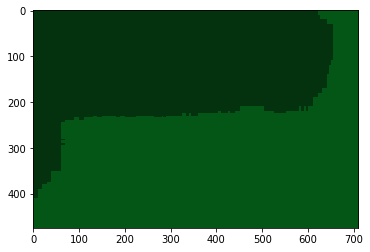

In [18]:
plt.imshow(matrix)

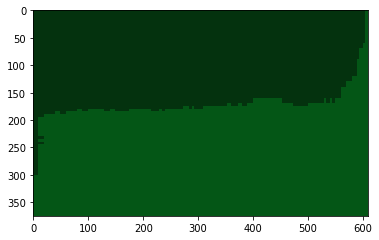

In [19]:
plt.imshow(matrix[50:-50, 50:-50])

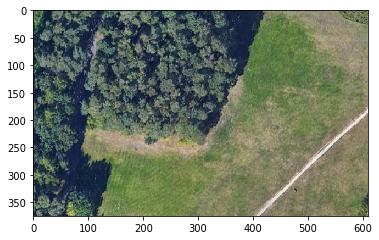

In [20]:
plt.imshow(img_orig)

In [21]:
# imgr = Image.fromarray( matrix )

In [22]:
# plt.imshow(mirror(imgr))